In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('student_depression_dataset.csv')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
df.dtypes

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object

In [7]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [8]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.drop('id', axis=1, inplace=True)

# **EDA**

In [11]:
df['Depression'] = df['Depression'].map({0:'No', 1:'Yes'})

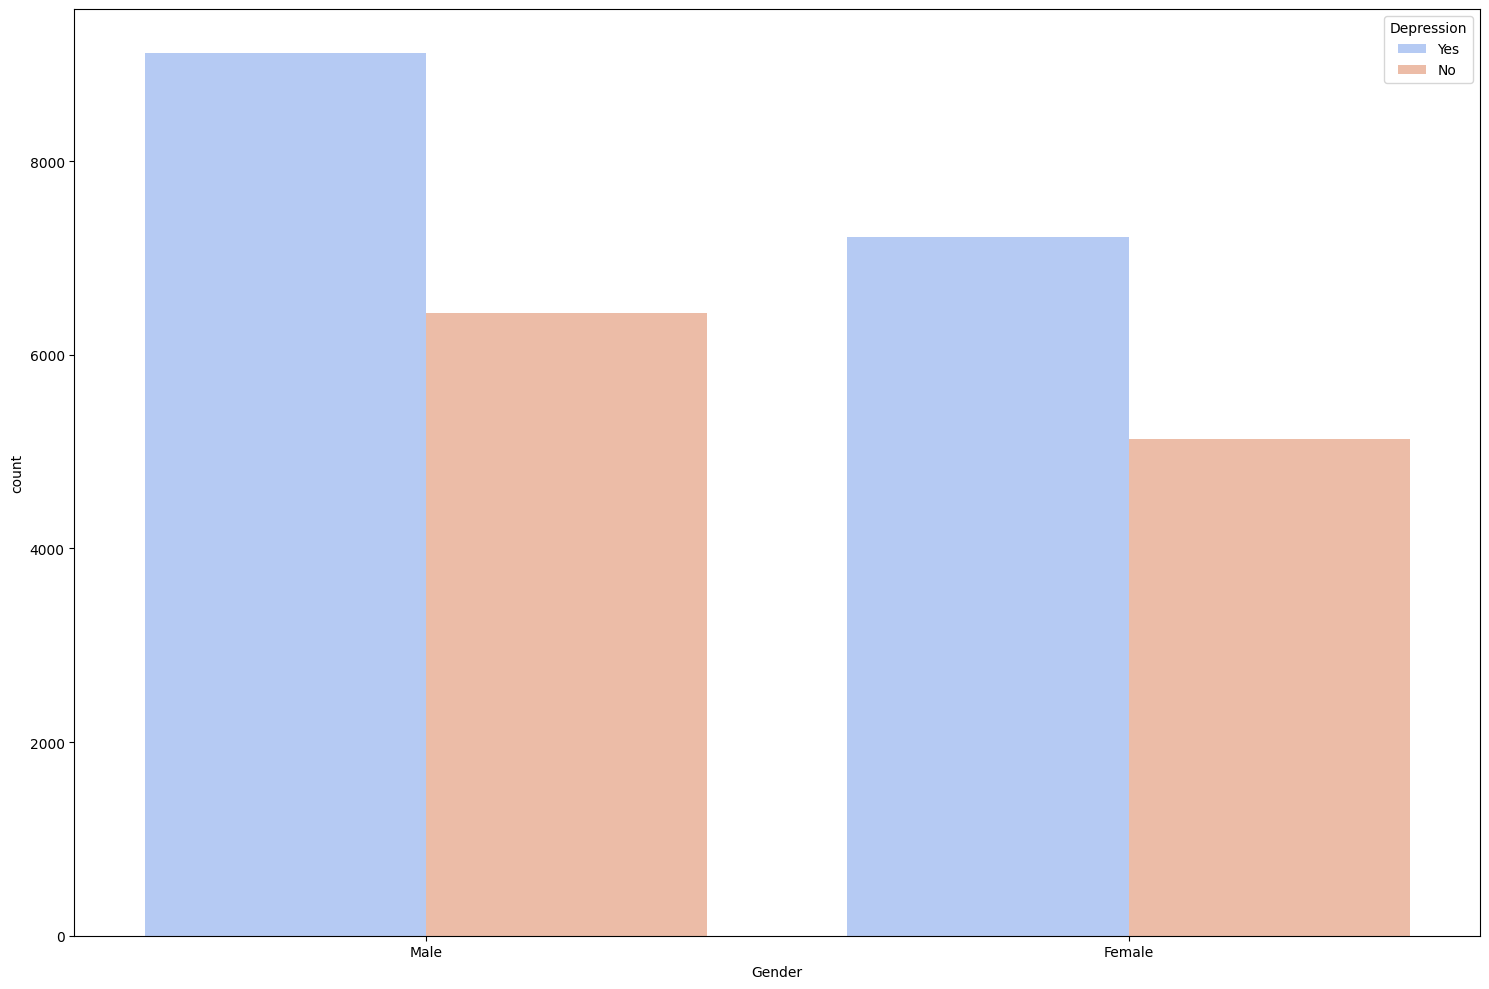

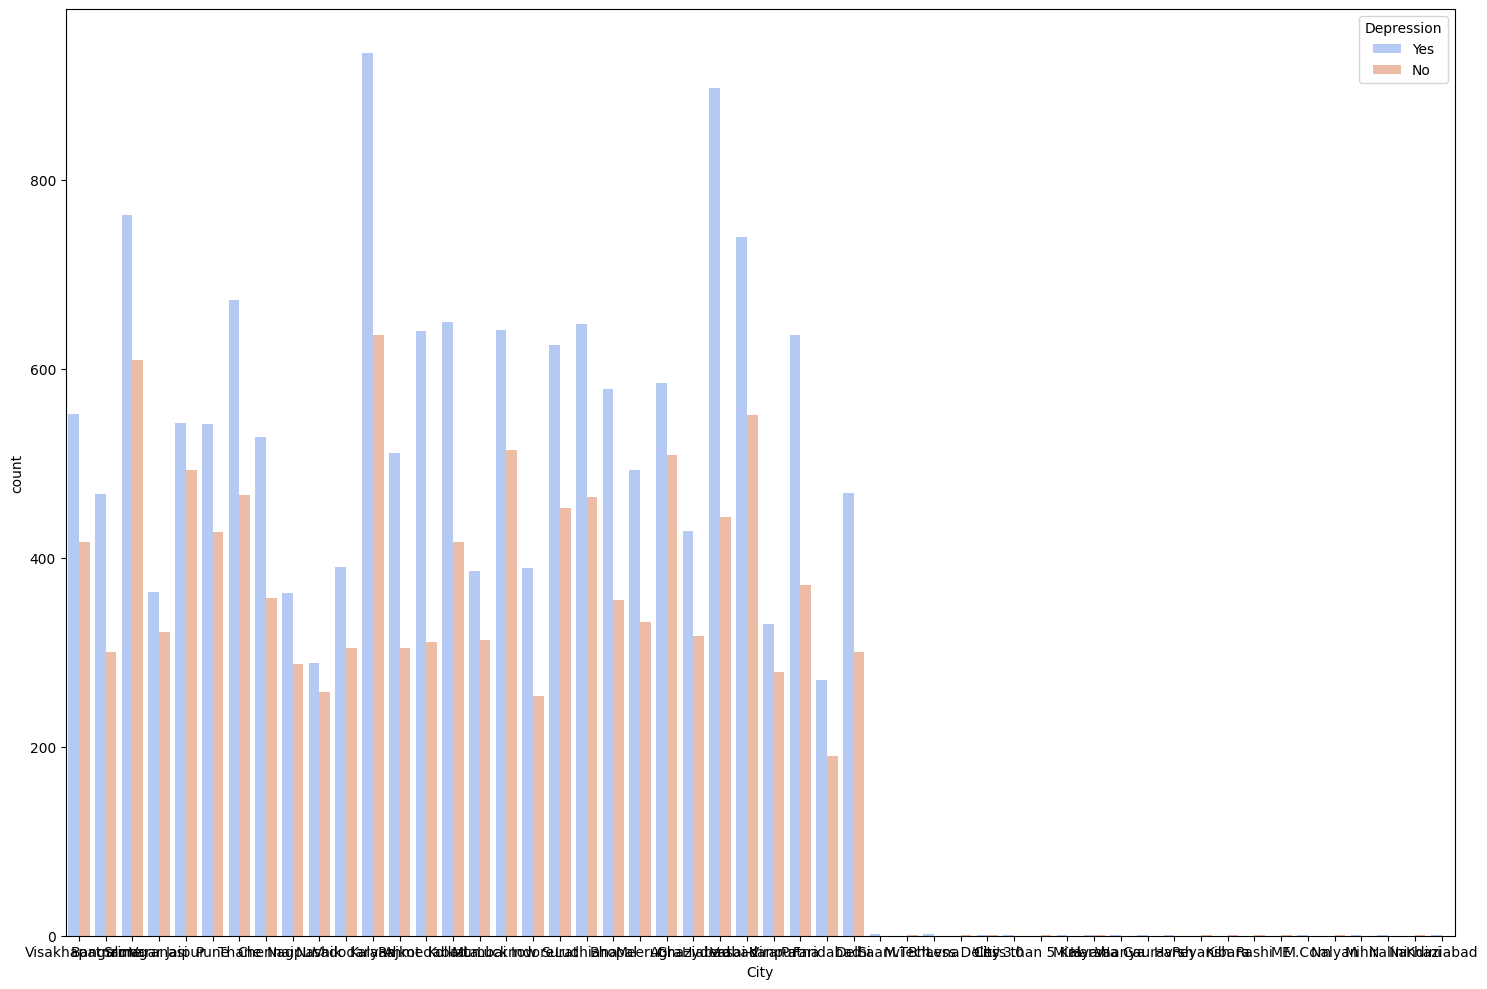

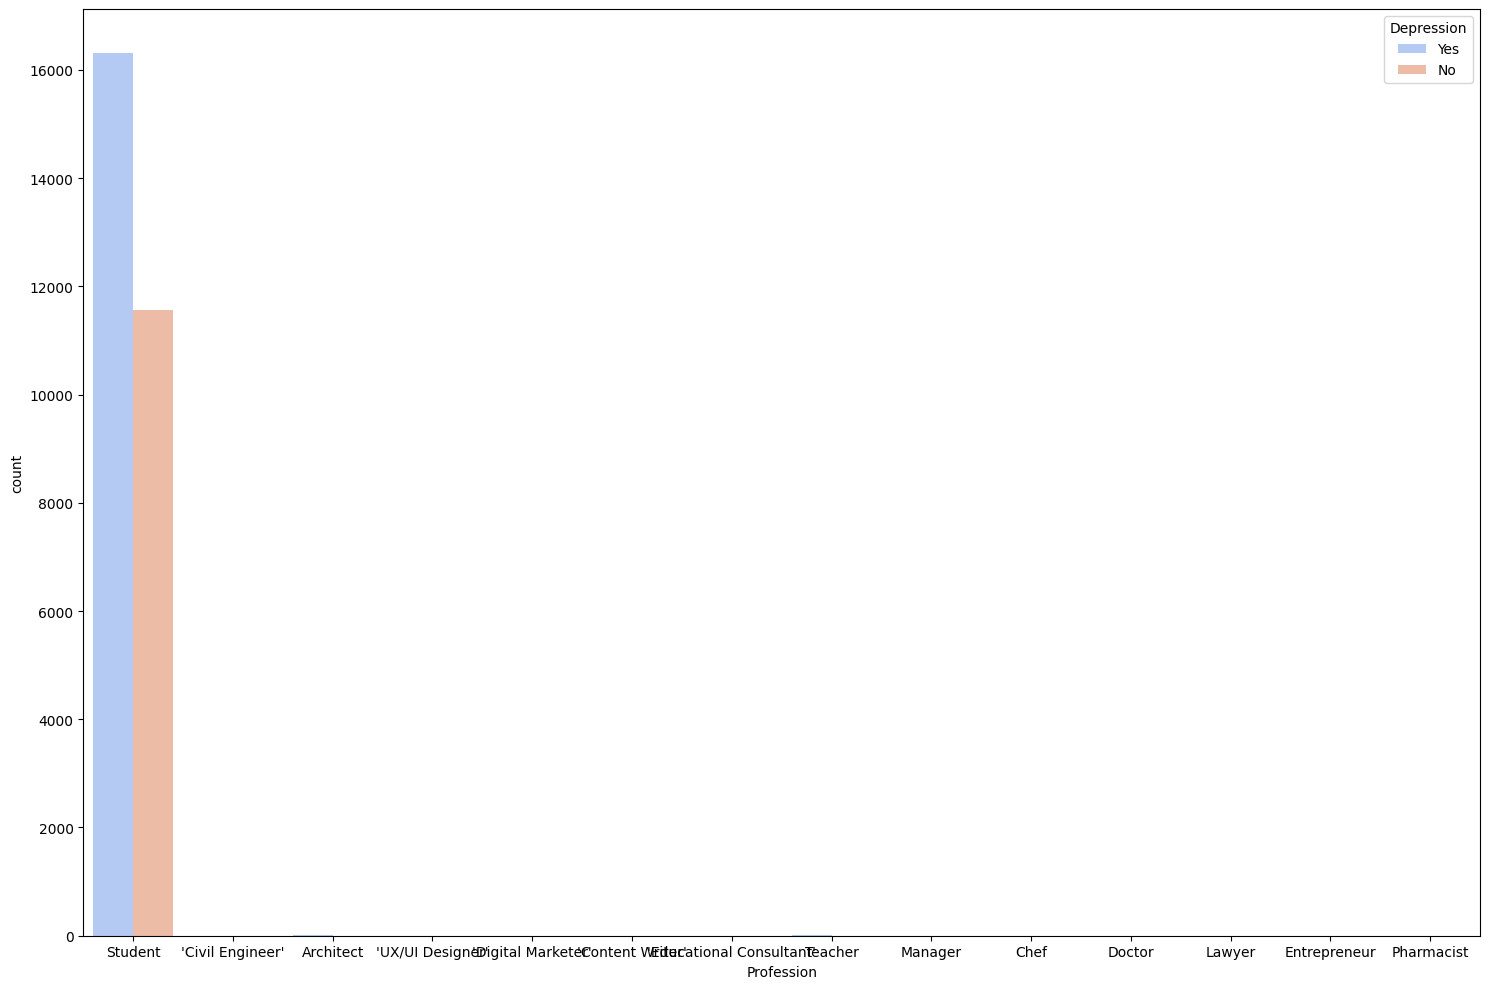

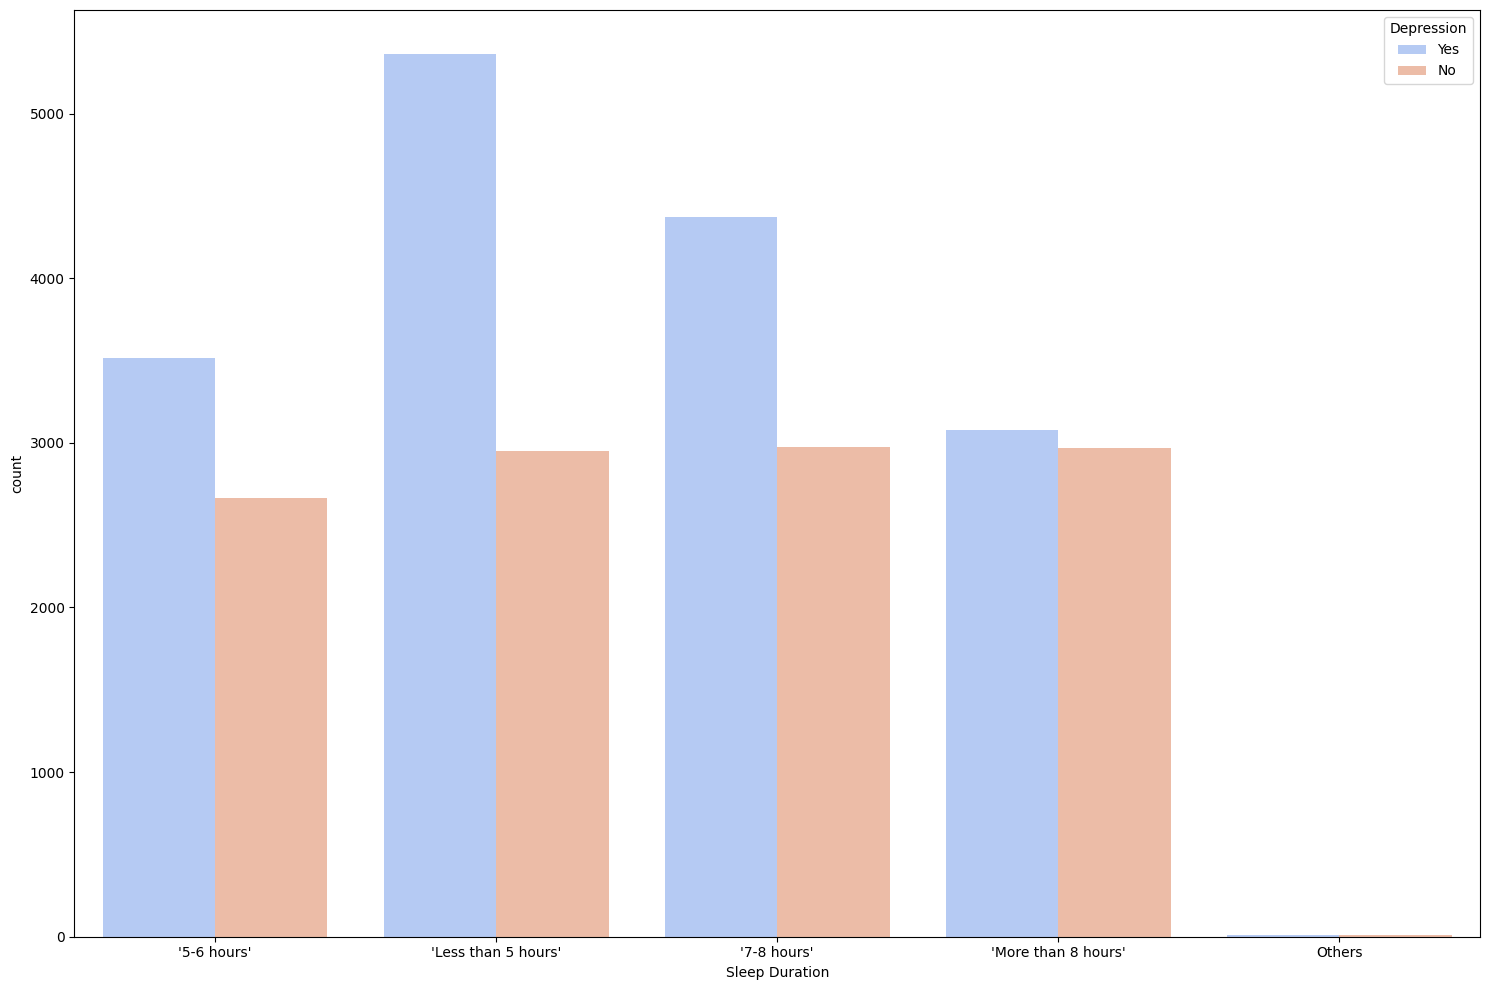

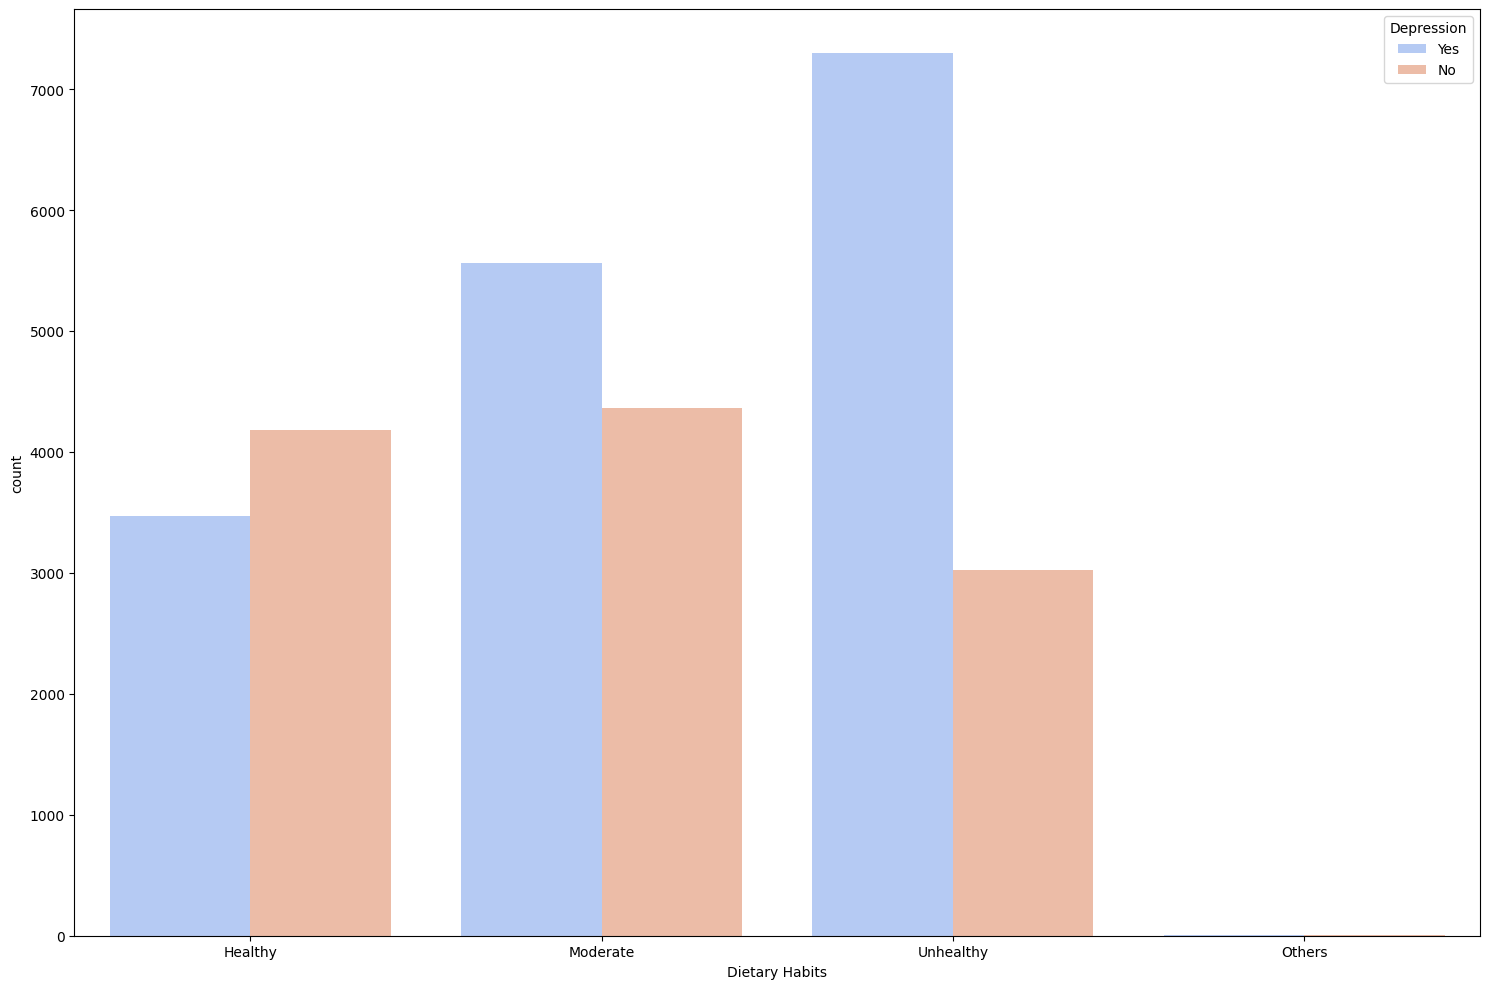

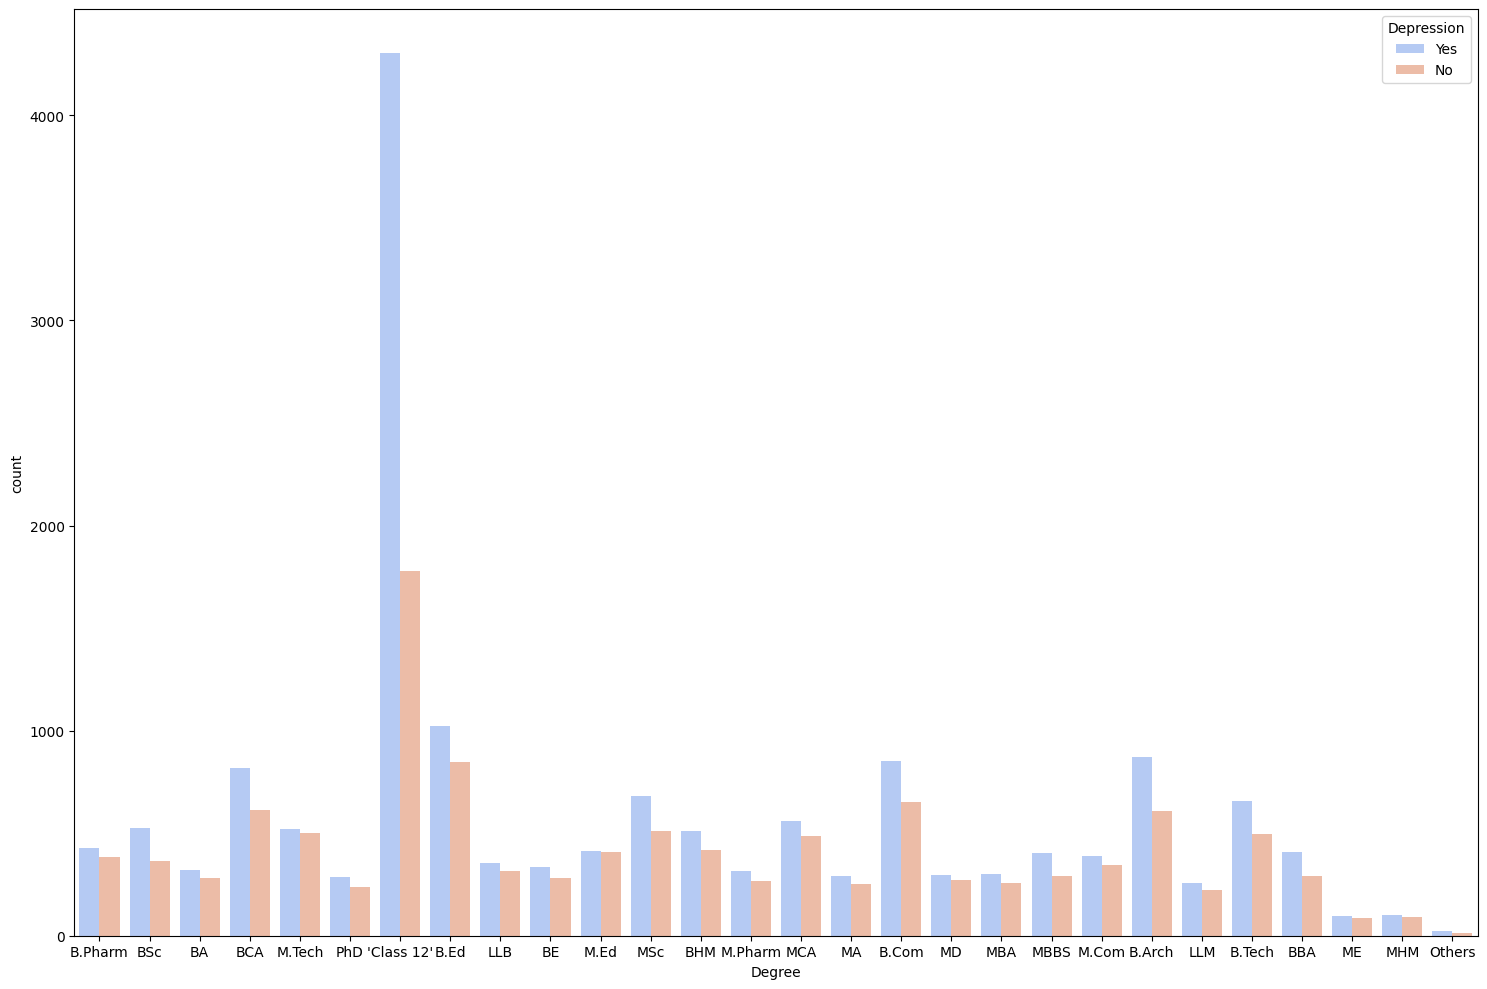

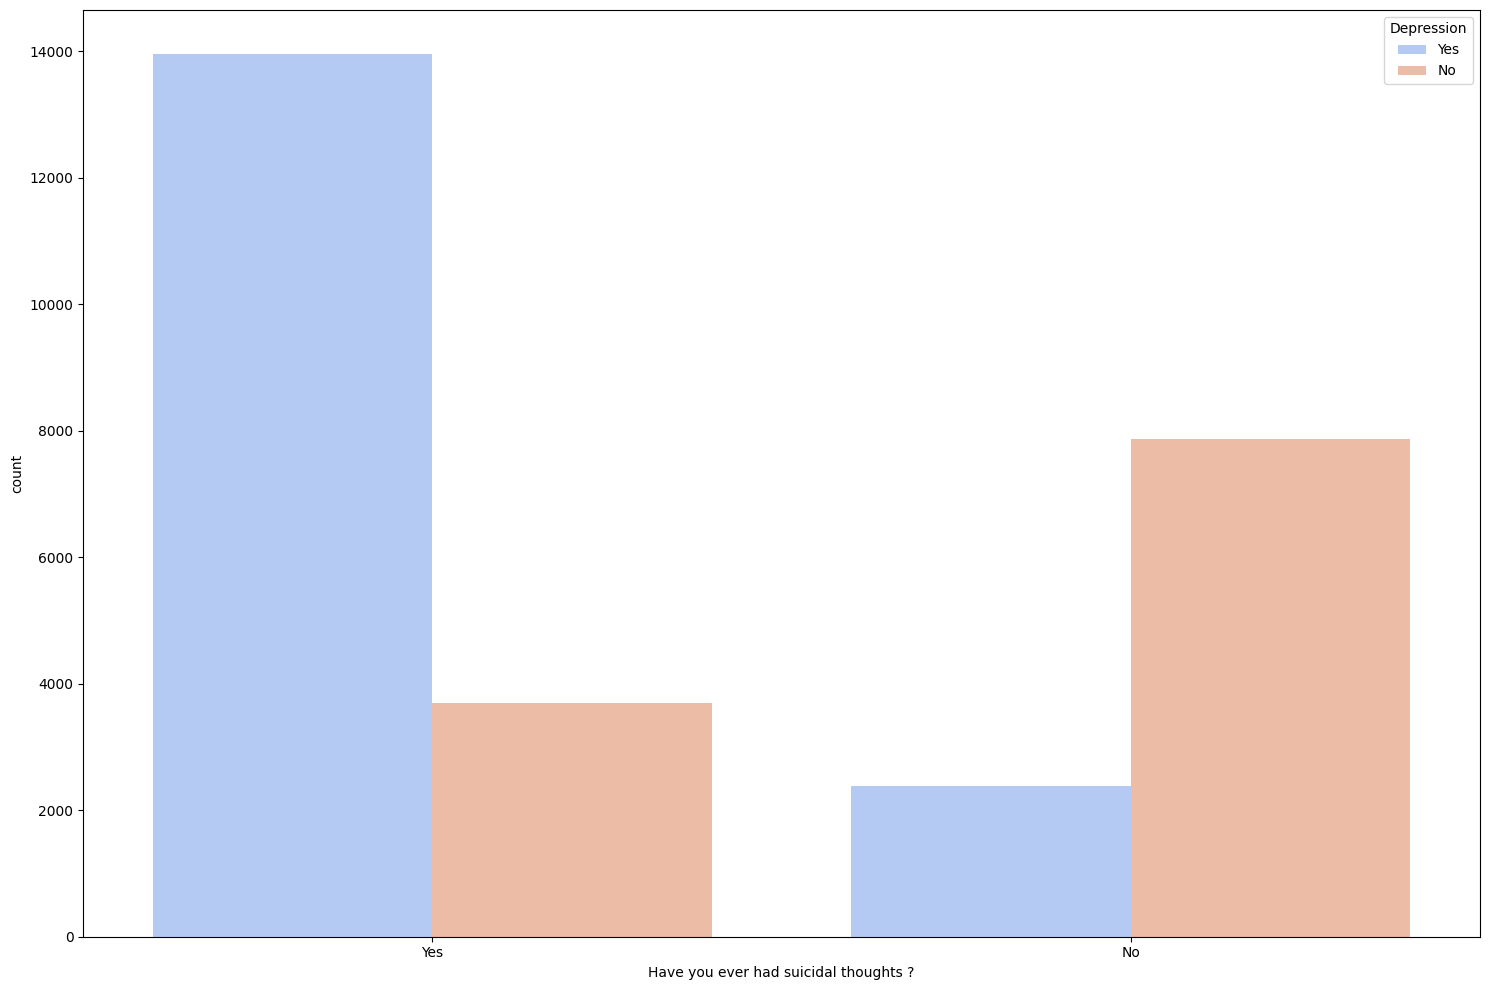

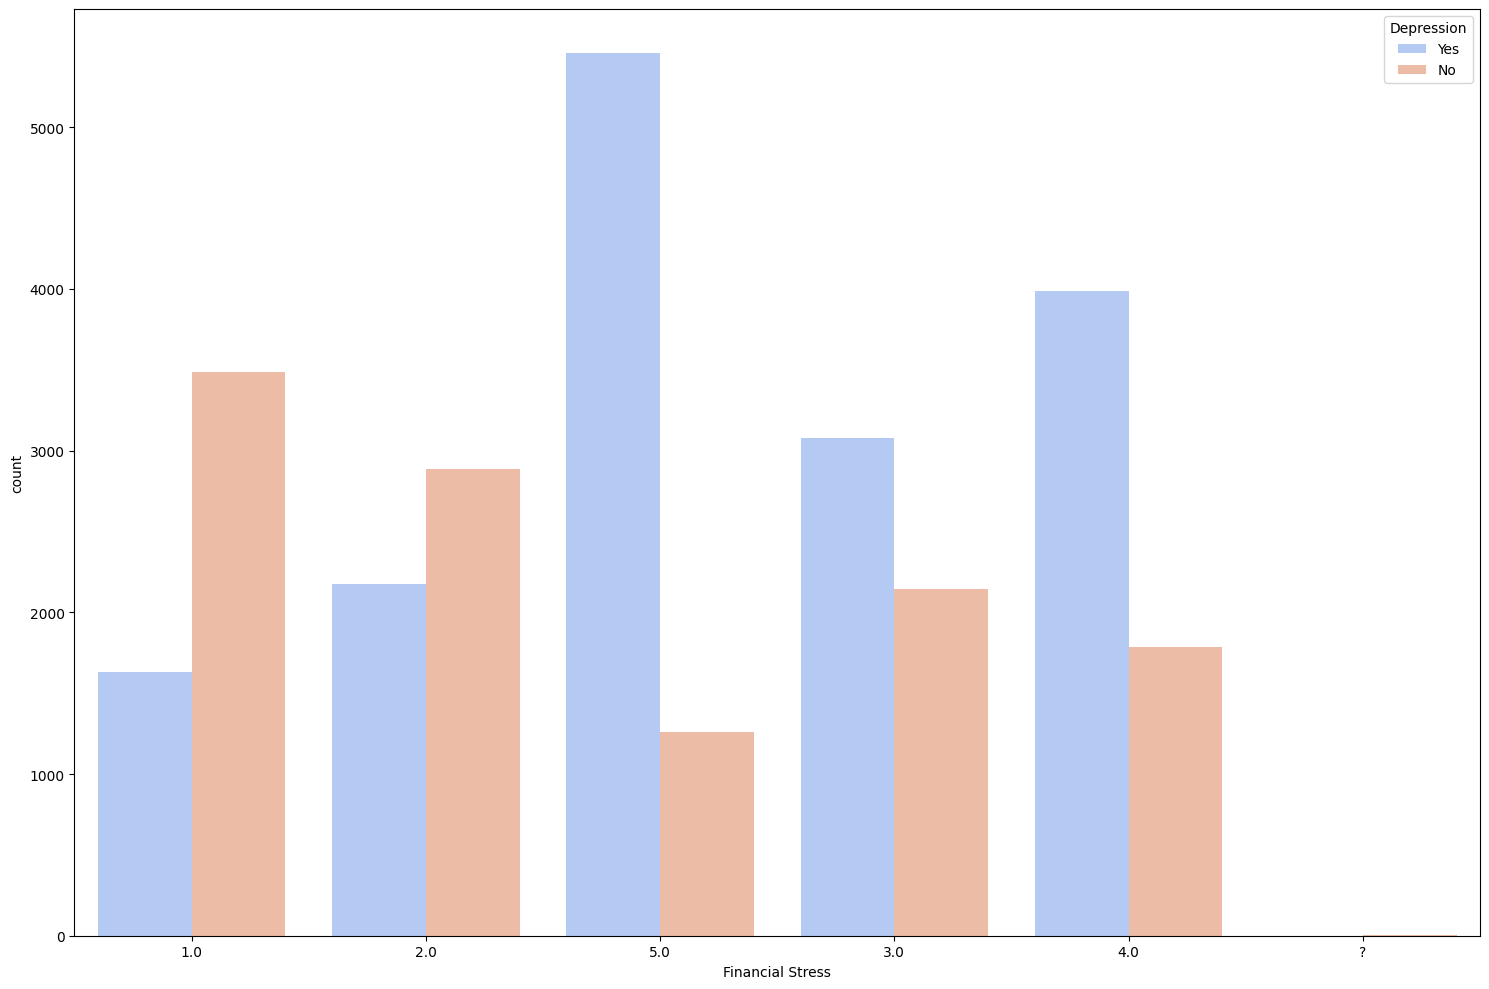

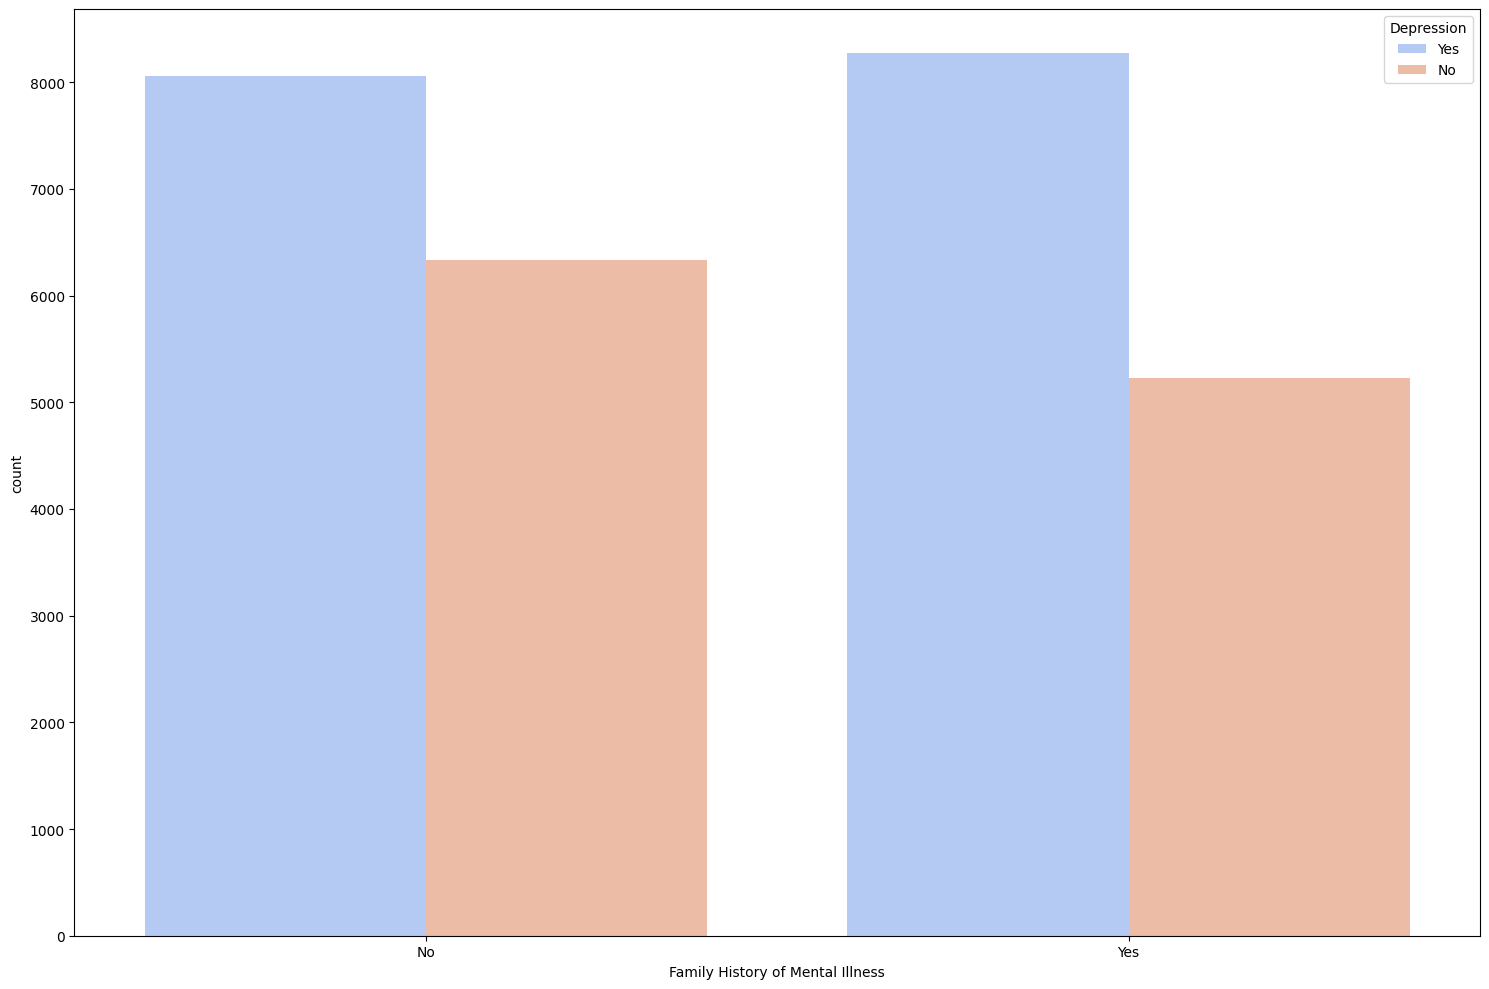

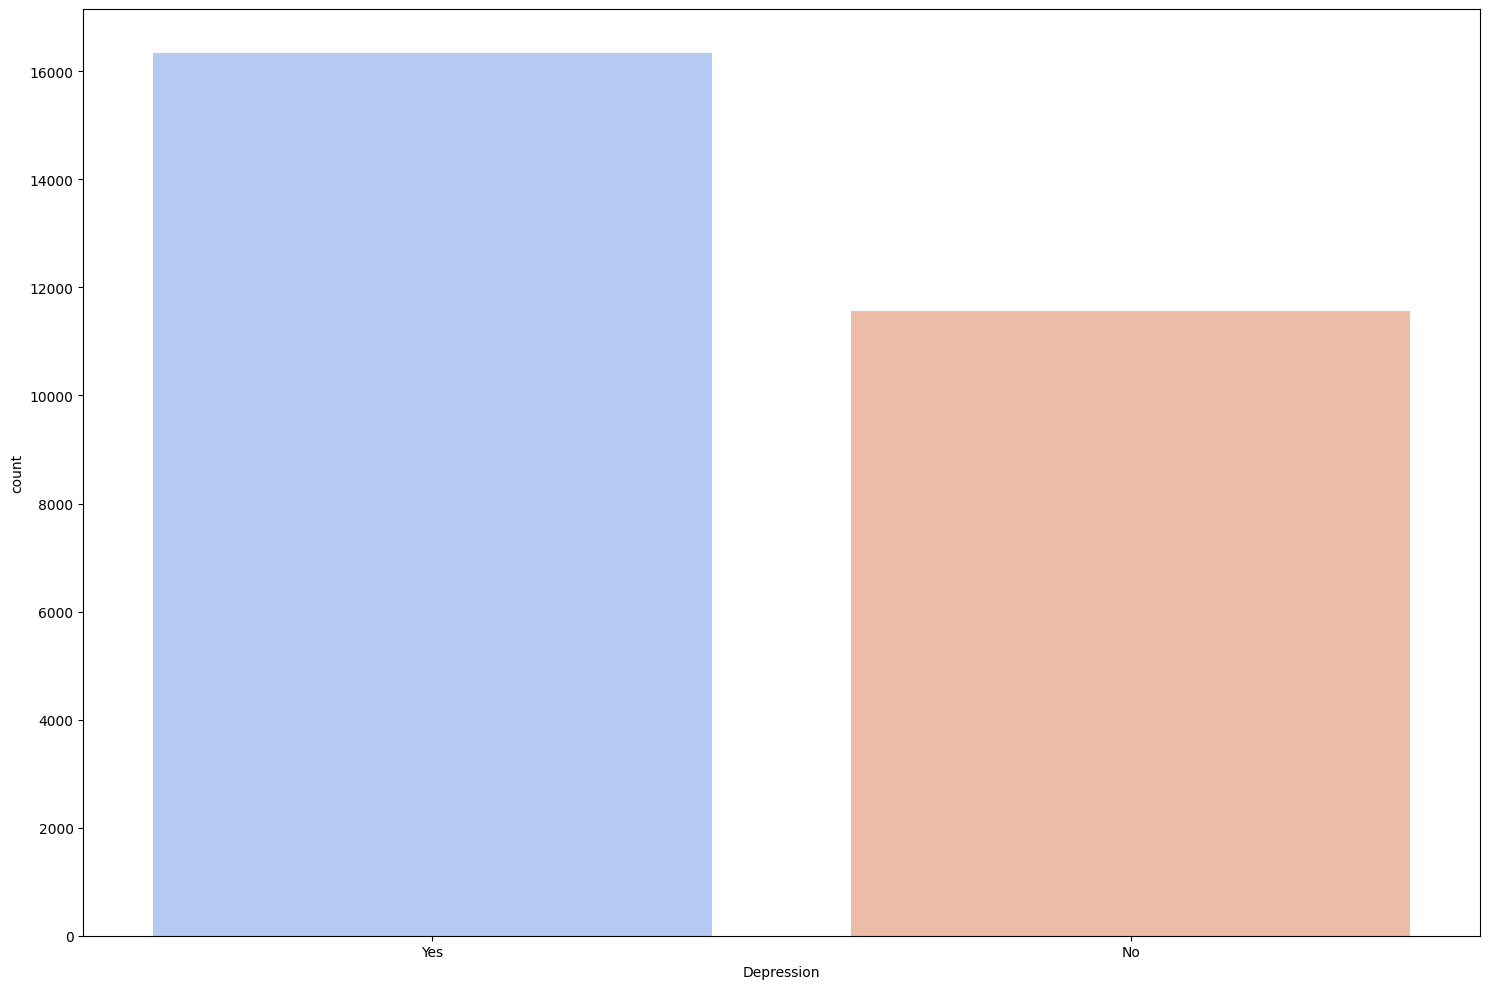

In [12]:
cat_cols = df.select_dtypes(include=['object'])

for col in cat_cols:
    plt.figure(figsize=(15, 10))
    sns.countplot(data=df, x=col, hue='Depression', palette='coolwarm')
    plt.tight_layout()

<Axes: xlabel='Age', ylabel='count'>

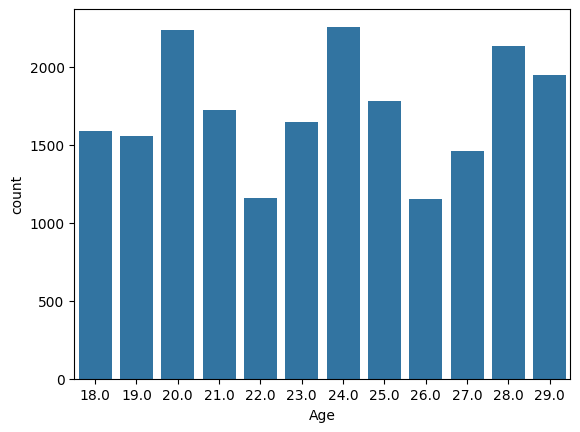

In [13]:
sns.countplot(data=df[df['Age']<30], x='Age')

<Axes: xlabel='Age', ylabel='Frequency'>

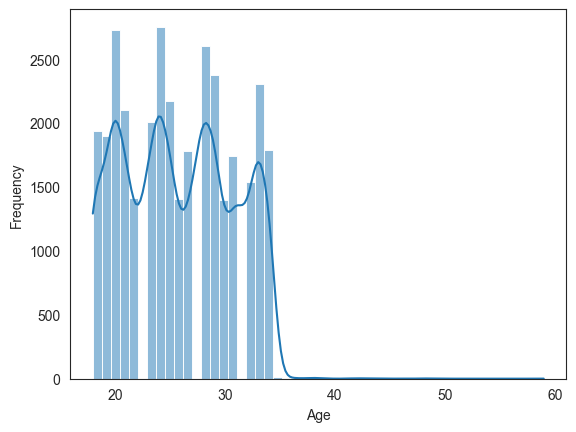

In [14]:
sns.set_style('white')
sns.histplot(data=df, x='Age', kde=True, bins=50, stat='frequency')

<Axes: xlabel='Depression', ylabel='Degree'>

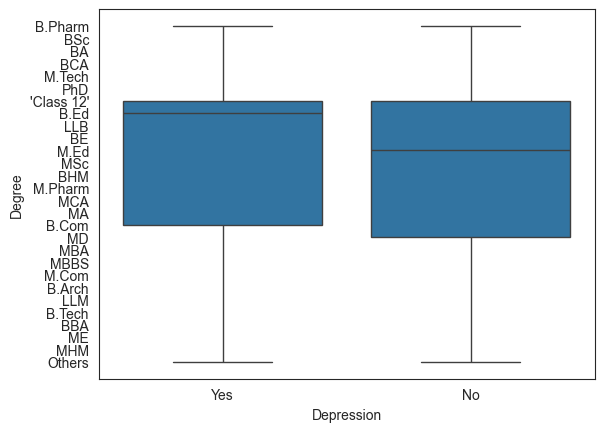

In [15]:
sns.boxplot(data=df, x='Depression', y='Degree')

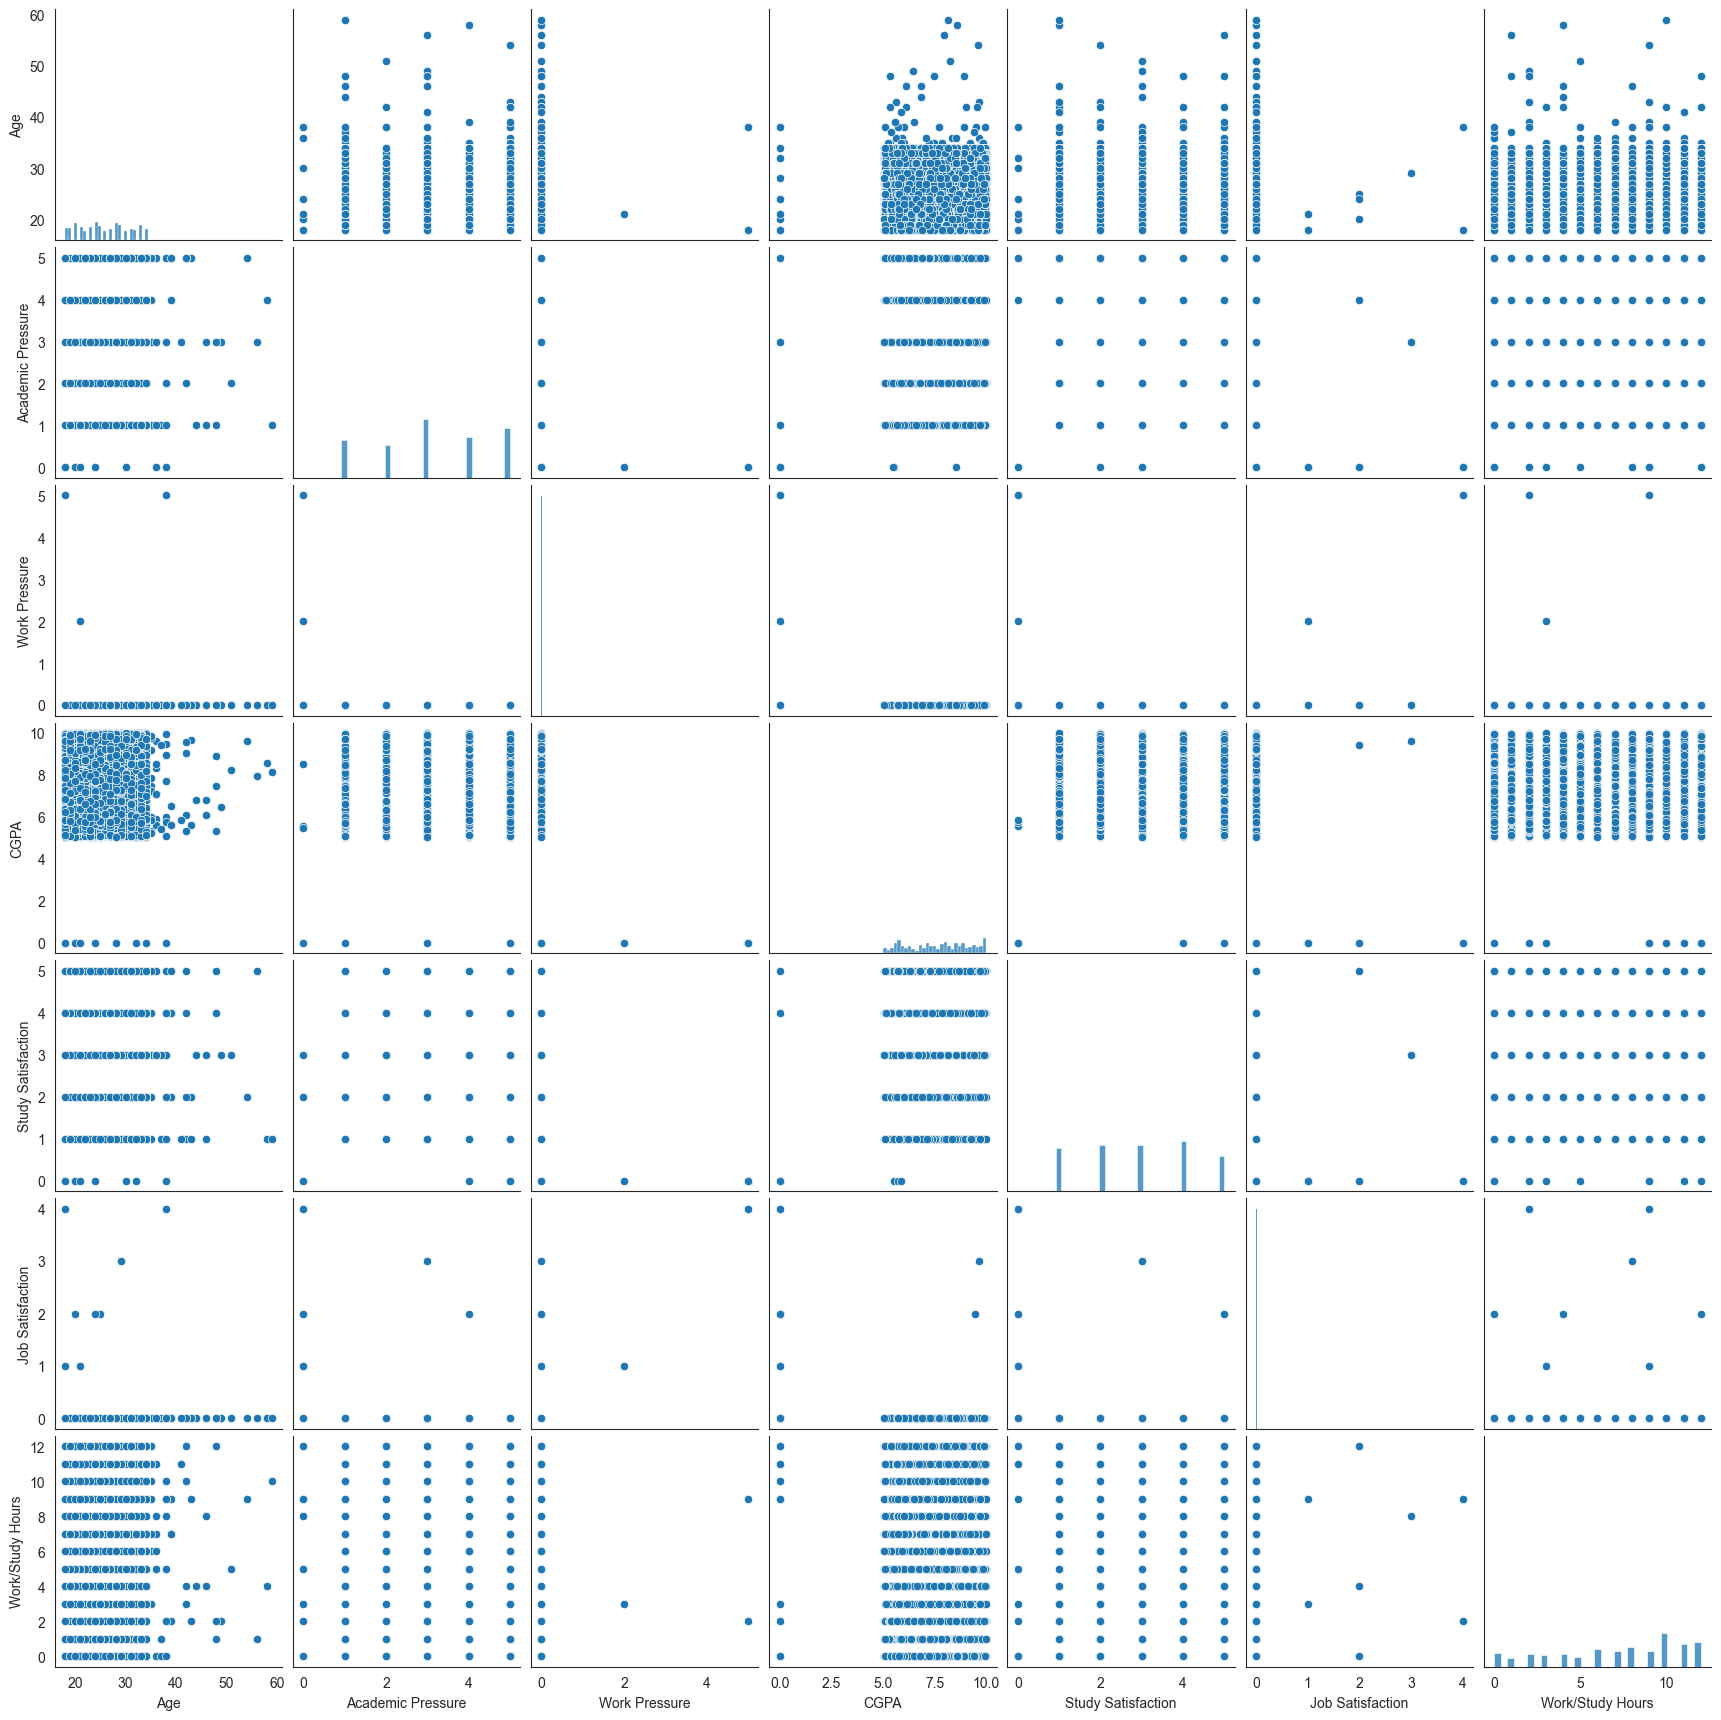

In [16]:
sns.pairplot(df)

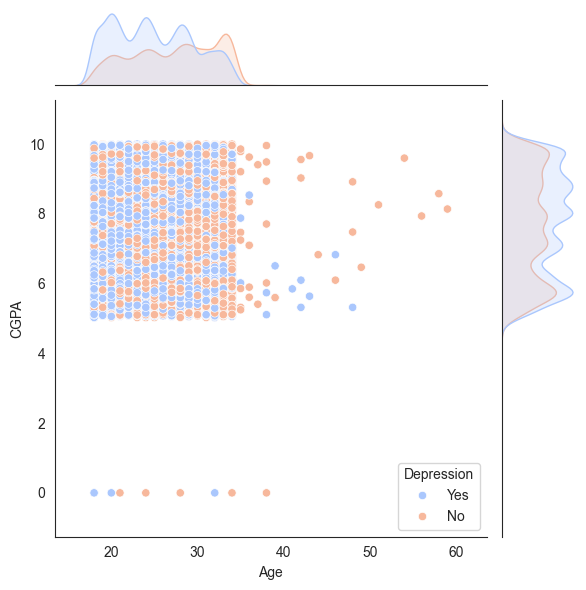

In [17]:
sns.jointplot(data=df, x='Age', y='CGPA', hue='Depression', palette='coolwarm')

<Axes: xlabel='Depression', ylabel='Sleep Duration'>

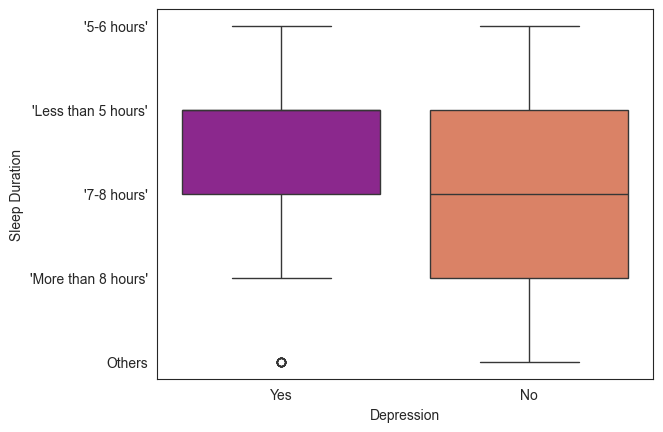

In [18]:
sns.boxplot(data=df, x='Depression', y='Sleep Duration', palette='plasma')

In [19]:
df['Depression'] = df['Depression'].map({'No':0, 'Yes':1})

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Academic Pressure'),
  Text(0, 2.5, 'Work Pressure'),
  Text(0, 3.5, 'CGPA'),
  Text(0, 4.5, 'Study Satisfaction'),
  Text(0, 5.5, 'Job Satisfaction'),
  Text(0, 6.5, 'Work/Study Hours'),
  Text(0, 7.5, 'Depression')])

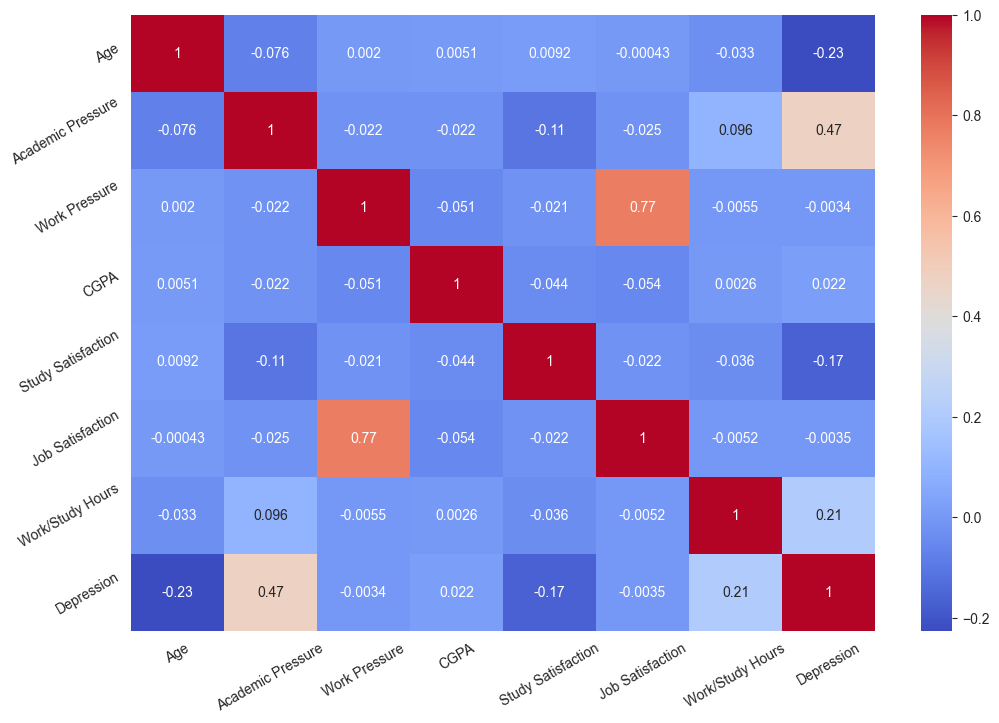

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=30)

# **Split & Train** 

In [21]:
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [22]:
df.dropna(inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
cat_cols = df.select_dtypes(include=['object'])

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [25]:
X = df.drop('Depression', axis=1)
y = df['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
models = {
    'Logistic Regression': LogisticRegression(), 
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=200),
    'Support Vector Machine': SVC(),
    'XG Boost': XGBClassifier()
}

In [27]:
results = {}
accuracy = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = y_pred
    accuracy[name] = accuracy_score(y_test, y_pred)

In [28]:
for name, pred in results.items():
    print(name)
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    print('\n\n')

Logistic Regression
[[2712  770]
 [ 516 4372]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      3482
           1       0.85      0.89      0.87      4888

    accuracy                           0.85      8370
   macro avg       0.85      0.84      0.84      8370
weighted avg       0.85      0.85      0.85      8370




K Nearest Neighbors
[[2434 1048]
 [ 888 4000]]
              precision    recall  f1-score   support

           0       0.73      0.70      0.72      3482
           1       0.79      0.82      0.81      4888

    accuracy                           0.77      8370
   macro avg       0.76      0.76      0.76      8370
weighted avg       0.77      0.77      0.77      8370




Decision Tree
[[2452 1030]
 [ 940 3948]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      3482
           1       0.79      0.81      0.80      4888

    accuracy                           0.

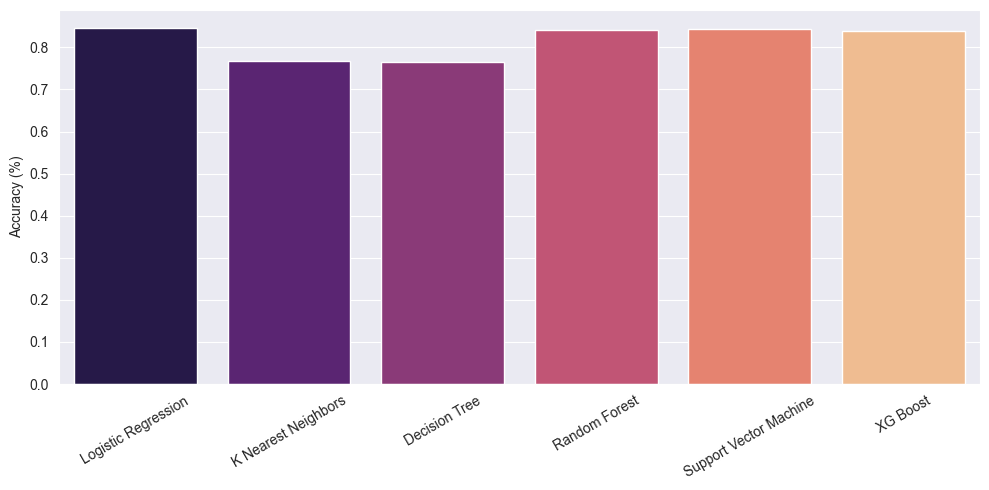

In [29]:
plt.figure(figsize=(10, 5))
sns.set_style('darkgrid')
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette='magma')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=30)
plt.tight_layout()